<a href="https://colab.research.google.com/github/JayP127/Climate_change_portfolio/blob/main/SensitivityPortfolioOptimizationScipy20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for climate change problem- Minimizing cost of CO2 abatement

In [5]:
pip install seaborn

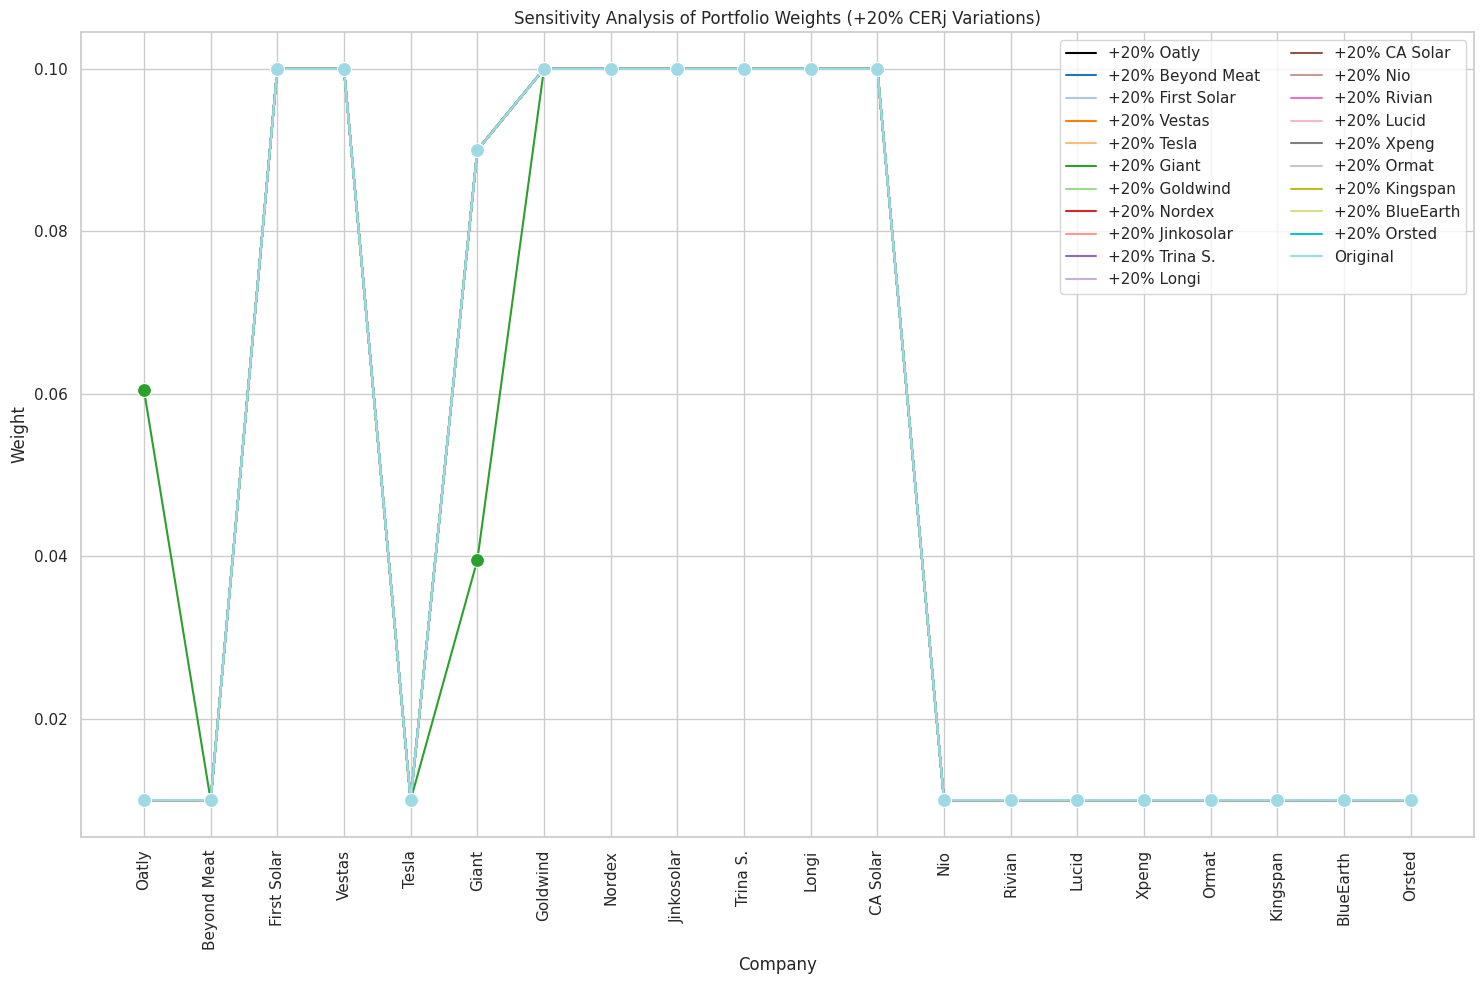

In [15]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given data and functions
company_cerj = {
    "Oatly": 52,
    "Beyond Meat": 54,
    "First Solar": 15,
    "Vestas": 6,
    "Tesla": 544,
    "Giant": 44,
    "Goldwind": 1.63,
    "Nordex": 1.54,
    "Jinkosolar": 2.43,
    "Trina S.": 0.80,
    "Longi": 1.65,
    "CA Solar": 0.47,
    "Nio": 171,
    "Rivian": 456,
    "Lucid": 1697,
    "Xpeng": 154,
    "Ormat": 184,
    "Kingspan": 84,
    "BlueEarth": 87,
    "Orsted": 248
}

companies = list(company_cerj.keys())
cerj_values = list(company_cerj.values())

def objective_with_cerj(w, cerj_values):
    return 1.0 / sum([w[i] / cerj_values[i] for i in range(len(w))])

def constraint(w):
    return sum(w) - 1.0

# Perform original optimization
w0 = np.array([0.05] * len(companies))
bounds = [(0.01, 0.10) for _ in range(len(companies))]
constraints = {'type': 'eq', 'fun': constraint}
result = minimize(objective_with_cerj, w0, args=(cerj_values,), method='SLSQP', bounds=bounds, constraints=constraints)
original_optimized_weights = result.x if result.success else None

# Initialize DataFrame for corrected sensitivity analysis
df_increase = pd.DataFrame(columns=['Company', 'Scenario', 'Weight'])

# Perform corrected sensitivity analysis for increased CERj
for i in range(len(companies)):
    cerj_values_temp = cerj_values.copy()
    cerj_values_temp[i] *= 1.2
    result = minimize(objective_with_cerj, w0, args=(cerj_values_temp,), method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        temp_df = pd.DataFrame({
            'Company': companies,
            'Scenario': f'+20% {companies[i]}',
            'Weight': result.x
        })
        df_increase = pd.concat([df_increase, temp_df])

# Add the original weights to the dataframe
if original_optimized_weights is not None:
    temp_df = pd.DataFrame({
        'Company': companies,
        'Scenario': 'Original',
        'Weight': original_optimized_weights
    })
    df_increase = pd.concat([df_increase, temp_df])

# Plot using Seaborn for +20% CERj Variations
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
palette = sns.color_palette("tab20", len(df_increase['Scenario'].unique()) - 1)
palette = ['black'] + palette  # Add black for the 'Original' scenario
sns.lineplot(x='Company', y='Weight', hue='Scenario', data=df_increase,
             palette=palette, marker='o', markersize=10)
plt.title('Sensitivity Analysis of Portfolio Weights (+20% CERj Variations)')
plt.xticks(rotation=90)
plt.legend(ncol=2, loc='upper right')
plt.tight_layout()
plt.show()


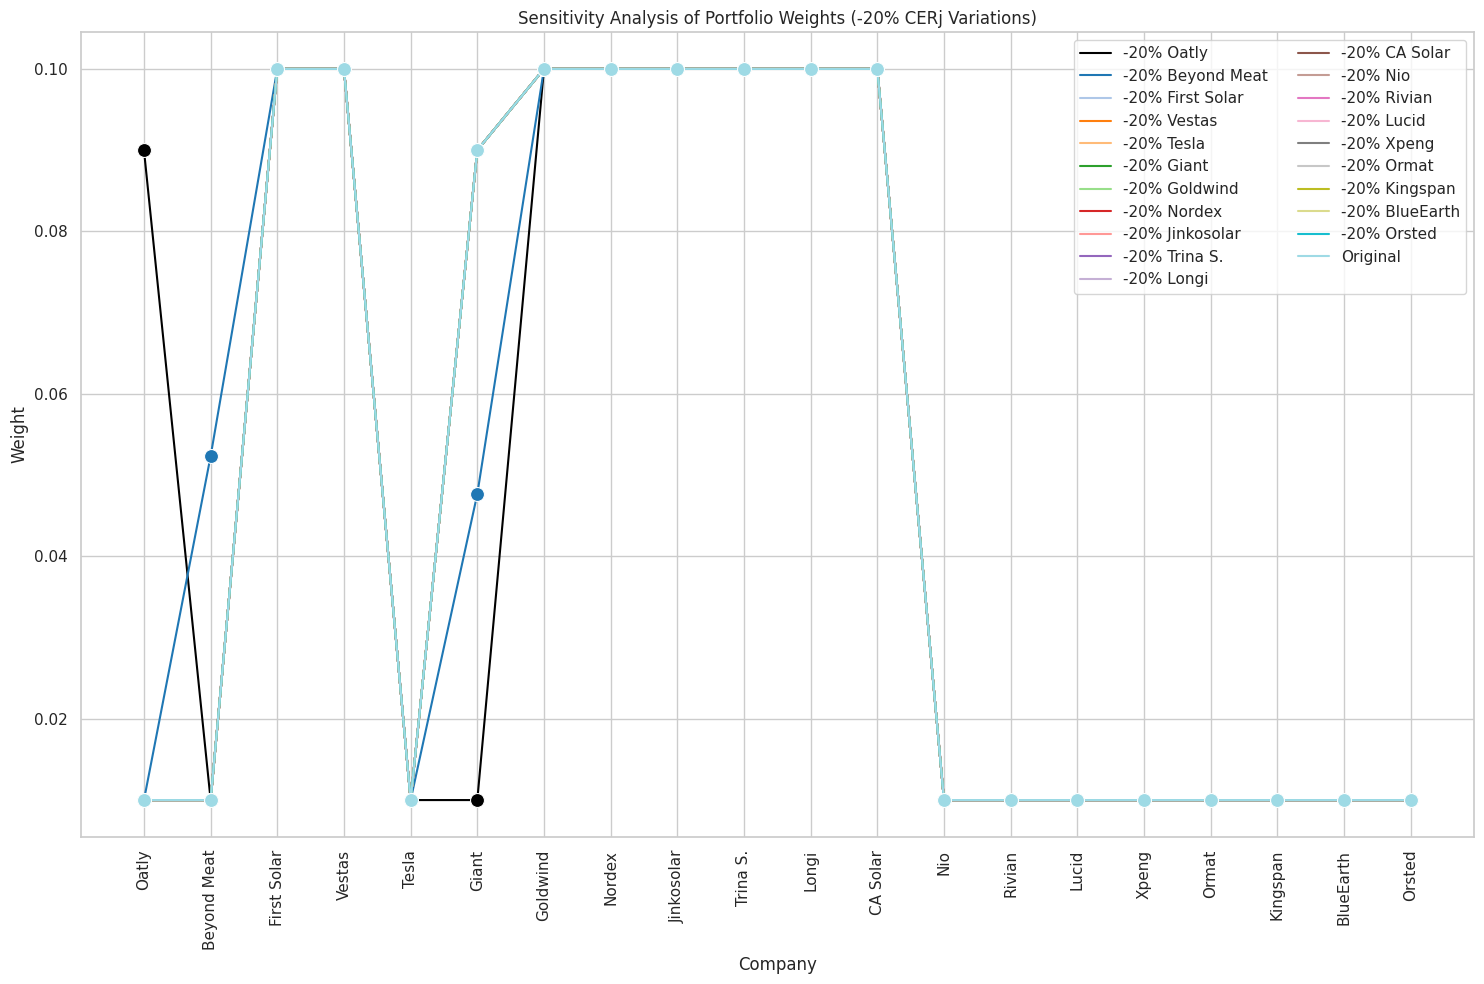

In [16]:
# Initialize DataFrame for corrected sensitivity analysis for decreased CERj
df_decrease = pd.DataFrame(columns=['Company', 'Scenario', 'Weight'])

# Perform corrected sensitivity analysis for decreased CERj
for i in range(len(companies)):
    cerj_values_temp = cerj_values.copy()
    cerj_values_temp[i] *= 0.8
    result = minimize(objective_with_cerj, w0, args=(cerj_values_temp,), method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        temp_df = pd.DataFrame({
            'Company': companies,
            'Scenario': f'-20% {companies[i]}',
            'Weight': result.x
        })
        df_decrease = pd.concat([df_decrease, temp_df])

# Add the original weights to the dataframe for decreased CERj
if original_optimized_weights is not None:
    temp_df = pd.DataFrame({
        'Company': companies,
        'Scenario': 'Original',
        'Weight': original_optimized_weights
    })
    df_decrease = pd.concat([df_decrease, temp_df])

# Plot using Seaborn for -20% CERj Variations
plt.figure(figsize=(15, 10))
palette = sns.color_palette("tab20", len(df_decrease['Scenario'].unique()) - 1)
palette = ['black'] + palette  # Add black for the 'Original' scenario
sns.lineplot(x='Company', y='Weight', hue='Scenario', data=df_decrease,
             palette=palette, marker='o', markersize=10)
plt.title('Sensitivity Analysis of Portfolio Weights (-20% CERj Variations)')
plt.xticks(rotation=90)
plt.legend(ncol=2, loc='upper right')
plt.tight_layout()
plt.show()
